## Clustering
Cluster analysis involves separating objects into groups such that each object is more similar to other objects in its group than to objects in other groups. For our purposes, each object will correspond to a data point with $d$ features, each of which as a corresponding number associated. Clustering is typically be imperfect as there will always be objects that straddle the boundary of multiple groups and objects will not be cleanly separated. Nevertheless, clustering is a handy tool for exploratory data analysis, since it involves unsupervised learning -- it does not require the data scientist to provide labeled data. Labeled data in this context would be a set of data points that already have their groups determined. For cluster analysis, we do not need to assume we know any of our data points' groupings ahead of time.

To illustrate, consider the following picture below of a scatter plot of data points in two-dimensions. By eye, we can see in the plot on the left that there should be a way of grouping these data into three groups that are cleanly separated.
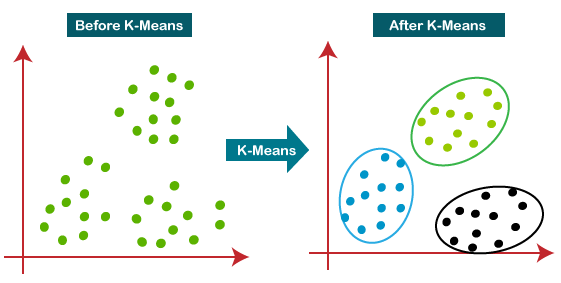
Notice that in the image on the right, the data points have been colored into 3 different groups that correspond well to those distinct groups we would pick out by eye. One algorithm that can accomplish this automatically is the K-Means algorithm for clustering. (Fig: Sharma 2021)

### How does the K-means method work?
The goal of K-means clustering is to partition $n$ observations (data points: $x_1$, $x_2$, ..., $x_n$) into $K$ groups such that each data point belongs to the cluster with the nearest mean or centroid $\mu_k$. The algorithm thus proceeds as follows:
1. Randomly choose initial cluster centroids $\mu_1$, $\mu_2$, ... , $\mu_K$.
2. Loop through every index $j$ and make the assignment $c(j) = {\rm arg}{\rm min}_i ||x_j - \mu_i||^2$. That is, assign the data point $x_j$ to cluster $c(j)$, the cluster for which $x_j$ has minimum distance to the cluster mean $\mu_{c(j)}$.
3. After this process, recalculate the means so for each $j$, we have
$$
\mu_j := \frac{\sum_{x_i \ {\rm in \ cluster} \ j} x_i }{n_{j}},
$$
where $n_j$ is the number of data points in cluster $j$.
4. Repeat steps 2 and 3 until no or very few data points change clusters.

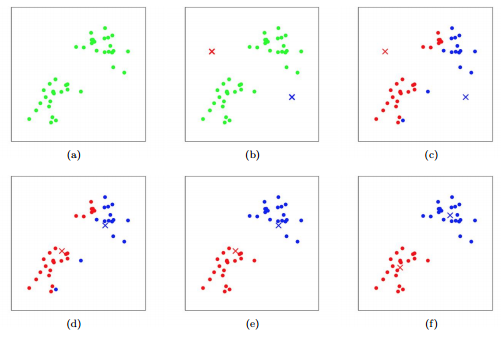
The above image demonstrates the steps of K-means. (a) Starting with a data set; (b) randomly assign two cluster centroids; (c) assign all data points to clusters based on proximity to centroids; (d) recompute centroids; (e) repeat data point assignment to centroids; (f) recompute centroids. (Fig: Ng & Jordan, Stanford)

### Knowledge check
Take 5 minutes to answer the following True/False knowledge check questions:
https://forms.gle/w31Yz7YAswwm15Dy8

### Applying KMeans to synthetic data
OK. Now to apply this method to some data sets using python. Let's start by loading the requisite packages. We'll actually start by making some artificial data (where we know we'll be able to obtain some nice clean clusters).

In [10]:
from sklearn.datasets import make_blobs

Using the makeblobs function we'll draw 200 samples that each have 2 features (dimensions) and come from 3 `blobs' (they are actually just normal distributions).

In [11]:
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 1.5)
print(raw_data)

(array([[  8.4656169 ,  -5.14435291],
       [  9.90437617,   2.78442745],
       [  8.27474067,  -4.60234299],
       [  8.57969352,   1.6950161 ],
       [  8.13169551,  -3.81840538],
       [ 13.09559822,   3.71963024],
       [  2.10538772,  -2.57756519],
       [ 10.05374486,   1.74511318],
       [  8.52448064,  -3.52977079],
       [ 10.56553205,   1.17134833],
       [  8.79236971,  -1.99340865],
       [  6.31079973,  -1.89964247],
       [  5.83712143,  -1.44196103],
       [  8.50557034,  -2.63393703],
       [  7.23527724,  -4.69950672],
       [  8.59741673,   1.08192053],
       [  9.0045195 ,  -4.45636301],
       [  9.27993489,  -3.8396002 ],
       [  8.17075251,  -0.39536075],
       [  8.80307536,  -0.6284358 ],
       [  4.48769175,  -6.00298236],
       [  9.85644399,   1.97680369],
       [  8.69581647,   2.64364266],
       [  7.89894125,  -5.41501953],
       [  8.20661293,   0.63478657],
       [  5.20076681,  -8.18055196],
       [  8.30097379,  -1.54474579],


By printing it, we can see its an object comprised of two arrays. One array contains 200 ordered pairs (our 200 data samples) and another array contains the actual `blob' from which each data point was drawn. In real data we would not have access to the latter, but it's nice here for us to be able to cross reference later and see how well K means might be able to recover these cluster identities.

Alright, now let's import the rest of our needed libraries. pandas for dataframe functionality; numpy for numerical computation tools; seaborn and matplotlib for plotting; we'll also make sure that plots appear inline.

In [12]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

First, let's just plot the all the data to see if we can spot clusters by eye.

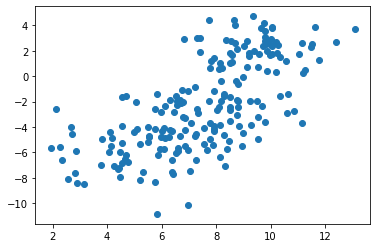

In [13]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1])

We see 3 clearly separated clusters. Let's color the points to see which `blobs' (normal distributions) they were actually drawn from.

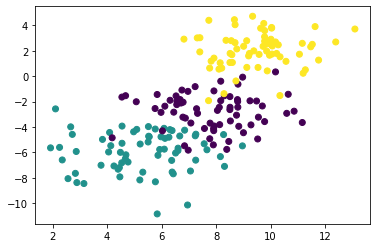

In [14]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])

Indeed each data point in a visually distinct cluster was drawn from a separate cluster. Now, let's assume we didn't know these cluster labels: Could K Means recover them via the algorithm we discussed above? To see this, let's build and train a clustering model. We'll start by importing the KMeans model from sklearn.

In [15]:
from sklearn.cluster import KMeans

Were we to have inspected the above data by eye, we might guess there are three clusters, so we can create an instance of the KMeans class with the cluster parameter set to 3.

In [16]:
model = KMeans(n_clusters=3)

Now we'll invoke the model and pass the ordered pairs from raw_data.

In [17]:
model.fit(raw_data[0])

KMeans(n_clusters=3)

We can see above the fitted model object has several options set including the algorithm used and maximum number of iterations. See here for more information about that:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Since this was an unsupervised learning algorithm, we did not have to split data into training and testing sets.

## Making predictions with our clustering model
We can now predict which cluster each data point is from or identify the center of each cluster as a means of making sense of our data. The first of these can be done using the labels_ attribute of our model object:

In [18]:
model.labels_

array([2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1,
       0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       0, 1], dtype=int32)

See that the above is a collection of numbers either 0, 1, or 2 corresponding to the predicted cluster number of each data point.

Cluster centers are obtained using the cluster_centers_ attribute:

In [19]:
model.cluster_centers_

array([[ 5.04693607, -6.13008256],
       [ 9.51204403,  2.1698038 ],
       [ 7.82327909, -2.93929631]])

See that the above are just 3 ordered pairs corresponding to each clusters center in terms of each feature.

Since this is not a supervised learning algorithm, we need not cross-validate with the labeled data. Typically, we would not be applying clustering to labeled data. We can however plot the above results in terms of colored dots and 'X's to see what our clustering algorithm has decided in terms of point labeling. To do so, we will again perform a scatter plot with dots colored according to cluster identity, but now also add the 'X's for cluster centroid.

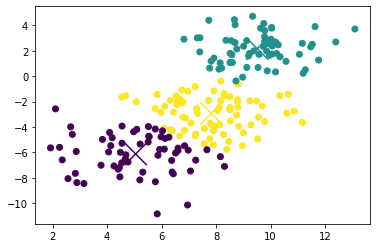

In [20]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=[0,1,2], marker='x', s=[500, 500, 500])

Now let's make the problem a bit harder by simply increasing the variance (to nine) and number (to five) of the normal distributions so they more likely overlap. In this case, it is unlikely we'll separate perfectly based on the blob of origin.

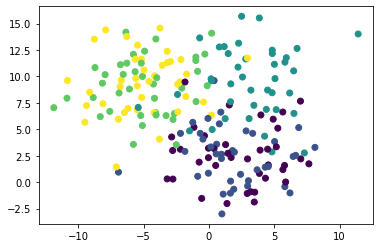

In [21]:
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 5, cluster_std = 3)
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])

While we've drawn from five blobs, even with color coding the blob of origin, we can see there's significant overlap. OK, now let's apply KMeans and try to pull out five clusters from this data.

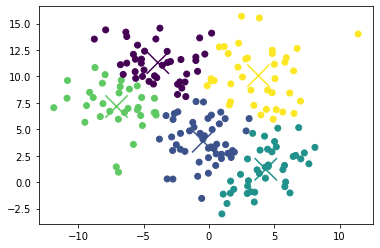

In [22]:
# generate an instance of the model with five clusters and fit to our existing data
model = KMeans(n_clusters=5)
model.fit(raw_data[0])

# scatter plot with the Kmeans generated cluster labels and overlay x's for the cluster centroids.
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=[0,1,2,3,4], marker='x', s=[500, 500, 500, 500, 500])

We can see that Kmeans did not necessarily recover the blobs that generated the data but does cleanly separate the data into distinct groups in separate portions of the domain. However, if we look at this data, it seems like it would be sufficient to try and use fewer clusters. Maybe even two would do the job. Let's see what that looks like.

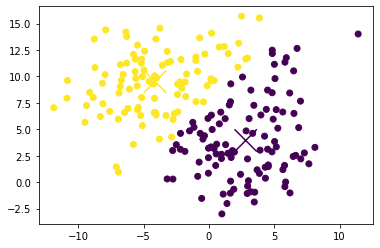

In [23]:
# generate an instance of the model with five clusters and fit to our existing data
model = KMeans(n_clusters=2)
model.fit(raw_data[0])

# scatter plot with the Kmeans generated cluster labels and overlay x's for the cluster centroids.
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=[0,1], marker='x', s=[500, 500])

Indeed, that works pretty well. But how do we know how many clusters to use for our data? Will we always go off of this eyeball metric or is there something more systematic? Python actually has many ways of quantifying the quality of a cluster model generated from Kmeans. We'll just discuss a couple now.

### Methods for determining Kmeans goodness-of-fit
The Elbow Method is the most popular for determine the optimal number of clusters. This method leverages a quantity called the Within-Cluster-Sum of Squared Errors (WSS) or inertia for different number of clusters $K$ and choosing the $K$ for which the WSS diminishes significantly. The formula for the WSS can be written
$$
WSS = \sum_{k=1}^K \sum_{j \in S_k} || x_j - \mu_k ||^2,
$$
where $S_k$ is the set of data points in the $k$th cluster and recall $\mu_k$ is the centroid of the $k$th cluster. The amount of variance in the data explained increases rapidly for a small number of clusters but such gains fall off as more clusters are used and this should be apparent in a curve representing either variance explained or error in grouping. The elbow is the point where this transition occurs. Admittedly, I find this method to be intuitive but a bit vague, since it's not always precisely apparent where exactly the elbow is. We'll illustrate this below.

Fortunately, python has this quantity, inertia, readily computed for us. Let's see what it is for our previous application of Kmeans to the five blob synthetic data set.

In [24]:
model.inertia_

4192.651928336829

OK. We can recover this number, but it does not have much meaning out of context. The only thing we really know is that smaller numbers represent a good account of variance in the data and larger numbers represent a poor account of Remember, we said this number was useful comparitively across different cluster counts $K$. In this sense $K$ can be considered a hyperparameter and the inertia (or WSS) is an objective function which we will calculate to determine the best choice of the hyperparameter. This means, we must try a number of $K$ values and then plot the inertia for each. The curve that's traced out should have some visible elbow and the $K$ value at this elbow will be our best choice. We'll also make a separate list of just the inertias to plot.

Text(0, 0.5, 'intertia (or WSS)')

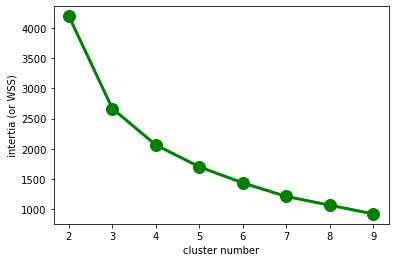

In [25]:
# lets make a list of models we'll append to
model_list = []
inertia_list = []
for j in range(2,10):
    model = KMeans(n_clusters=j)
    model.fit(raw_data[0])
    model_list.append(model)
    inertia_list.append(model.inertia_)
    
plt.plot(range(2,10),inertia_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("intertia (or WSS)")

There is a significant drop from two to three and three to four clusters, but much less of a drop from four to five clusters. As such, the most pronounced elbow in the inertia plot would be right at $K=4$ and we would pick this as the optimal cluster number. We can now go ahead and visualize the cluster labeling based on this model by pulling out that particular model.

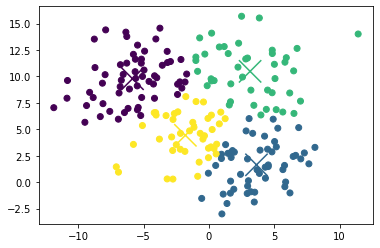

In [26]:
model = model_list[2]

plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=[0,1,2,3], marker='x', s=[500, 500,500,500])

Maybe the Elbow Method seems a bit too hand wavy to you. There are several other ways to pick the optimal number of clusters (Calinski-Harabasz Index, Davies-Bouldin Index, Dendrogram, Bayesian Information Criterion). One that is more systematic is the Silhouette Method. This method is a bit more complicated than the Elbow Method, but penalizes more complex models in the objective function it generates so there is a clear optimum that can be used to select the best $K$.

Each data point has a silhouette value quantifying how similar it is to its own cluster compared to other clusters (cohesion vs separation). This coefficient ranges between -1 and 1 where a value close to 1 indicates the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, the clustering configuration is efficient. We'll use Euclidean distance to compute the silhouette coefficients.

For a data point in cluster $k$, $x_j \in S_k$, let
$$
a(j) = \frac{1}{|S_k|-1} \sum_{x_i \in S_k} ||x_i - x_j||^2
$$
be the mean distance between $j$ and all the other data points (and note $|S_k|$ is the number of points in cluster $k$). The smaller this value, the better the data point fits in with the rest of the cluster.

In addition, we will define the minimum dissimilarity of the point $x_j$ to another cluster $S_{{\rm min}(j)}$ where $S_{{\rm min}(j)} \neq S_k$:
$$
b(j) = {\rm min}_{l \neq k} \frac{1}{|S_l|} \sum_{x_i \in S_l} || x_i - x_j||^2,
$$
which is the smallest mean distance of $x_j$ to all points in another cluster of which $x_j$ is not a member. This closest cluster is often referred to as the neighboring cluster.

Now, we can define the silhouette value of the data point $x_j$ as
$$
s(j) = \frac{b(j) - a(j)}{{\rm max}(a(j), b(j))}
$$
if $|S_k|>1$, and $s(j) = 0$ otherwise. As mentioned, $-1 \leq s(j) \leq 1$.

The silhouette coefficient for all of the data is given by the average of the silhouette coefficients for all data points
$$
SC_K = \frac{1}{N} \sum_{j=1}^N s(j),
$$
and the number of clusters $K$ for which $SC_K$ is maximizes is considered the optimal choice of clusters under this metric.

There is of course a function in python to do all of this, contained in the sklearn.metrics class, which we just need to give the outputs of our model fits. The code for doing this is below. We will apply it to our already fit models applied to the synthetic blobs data.

Text(0, 0.5, 'silhouette score')

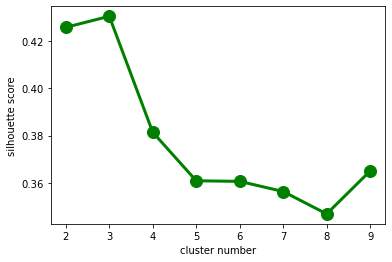

In [27]:
from sklearn.metrics import silhouette_score

silh_list = []

# loop through the fit models and compute the silhouette score and store in a list
# we use the Euclidean distance to compute distance between points and cluster
for j in range(0,8):
    model = model_list[j]
    silh_score = silhouette_score(raw_data[0], model.labels_, metric='euclidean')
    silh_list.append(silh_score)
    
plt.plot(range(2,10),silh_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("silhouette score")

Roughly consistent with our previous results, the best sihouette score occurs at two clusters. Just out of curiosity though, let's see what the cluster breakdown looks like when we try eight clusters (marked by the silhouette score as the worst cluster count).

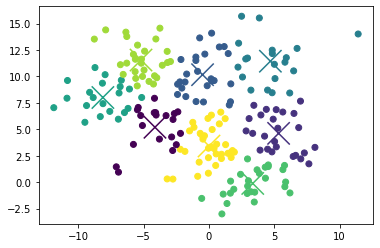

In [28]:
model = model_list[6]

plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=[0,1,2,3,4,5,6,7], marker='x', s=[500,500,500,500,500,500,500,500])

Given what we've learned, can you think of any advantages or disadvantages to either metric we've chosen to pick the best cluster number? Would you rather just visually inspect the data and the resulting clusters to determine this? Would that always be feasible?

OK, now that we've worked through a KMeans clustering analysis on synthetic data. Let's go ahead and perform such an analysis on some more elaborate data sets. We'll do a couple examples together and then you'll have a chance to practice these techniques on your own. In the process, we'll go further in learning about how best to clean and scale data for clustering and also how to use the labels beyond just plotting.

### Voting in the US Senate
The first data set we'll analyze is the voting record of the members of the 114th US Senate. An obvious question would be whether or not senators within the same political party vote as a block (cluster) or whether there are a few that tend to straddle the line or even caucus with the other party. We'll start by loading the data set, which we'll need the pandas package to do.

Make sure the csv file is in a folder called csvfiles and that that folder is in the same directory as your jupyter notebook or else make sure and chart the path there in the read_csv command below.

In [29]:
import pandas as pd

votes = pd.read_csv("csvfiles/114_congress.csv")

votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Above we see the breakdown of the voting on 15 different bills in the US senate. Along each column is a senator's vote and each column represents a different bill. The first three columns are the senators name, party, and state, and there is an index along the left.

Now, we'll specifically pull out just the data associated, which would be the columns of 0s, 1s, (and there are also a few 0.5s representing abstentions).

In [30]:
raw_data = votes.iloc[:, 3:]
print(raw_data.head())

   00001  00004  00005  00006  00007  00008  00009  00010  00020  00026  \
0    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0    1.0   
1    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    0.0    1.0   
2    1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0   
3    0.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
4    0.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0   

   00032  00038  00039  00044  00047  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    1.0    0.0    1.0    0.0  
2    1.0    1.0    0.0    1.0    1.0  
3    0.0    0.0    1.0    0.0    0.0  
4    0.0    1.0    0.0    1.0    0.0  


Let's see how partisan the voting is. Assuming we think there are two primary voting blocks, will KMeans pull these out as simply the Democrats and Republicans? This is an easy thing to examine by clustering based on the raw data above and then associating the cluster labels with political party.

In [31]:
model = KMeans(n_clusters=2)
model.fit(raw_data)

KMeans(n_clusters=2)

Now we'll create a crosstab which will show us how party labels are associated with cluster labels.

In [32]:
print(pd.crosstab(model.labels_, votes['party']))

party   D  I   R
row_0           
0       3  0  54
1      41  2   0


So it looks like all Republicans fall into cluster 0 and three Democrats do as well. In cluster 1 we have the remaining 41 Democrats and 2 Independents. The biggest question might then be is who are these three Democrats that tend to vote like the Republicans? You might be able to guess at least one based on their appearance in the news back in January and February for being kind of a fringe Democrat.

We can pull these out by making a list of senators who are both Democrats and cluster 0 members.

In [33]:
fringe_dems = votes[(model.labels_==0) & (votes['party']=='D')]

print(fringe_dems)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


Both Heitkamp and Manchin are Democrats living in conservative states, so the fact that they lean right makes sense. Reid was actually the Senate Minority Leader from 2015 to 2017 (when the 114th Congress was held). Why did he abstain so much? It was his last term in office and he did say that he was willing to work with the Rs before he lost the majority, so maybe this was a diplomatic way of voting with the majority? In any case, this is the breakdown of these three fringe senators' voting records.

Now how do we visualize these clusters given that we have fifteen dimensions and we really need two to make a scatter plot we can make sense of? One way of handling this is to use some method of dimension reduction. There are many such methods, but one common approach is principal components analysis. Without going into too much detail, we'll say this method uses linear algebra to find the most important directions of a high dimensional set of data points and then identifies the weights or coefficients of those directions for each data point. Technically they are the eigendirections of the data covariance matrix computed using a singular value decomposition, but don't worry if those terms are unfamiliar to you. Just know that we're using a reliable method to project the data down to two dimensions. Fortunately, sklearn has a function for doing this. **Compressing this description**

In [34]:
from sklearn.decomposition import PCA

# use the PCA method and extract two directions from the data
pca_2 = PCA(2)

# now turn the vote data into two columns using PCA
pca_columns = pca_2.fit_transform(raw_data)

Now we'll plot and shade based on cluster identity to see if these two methods agree in terms of how the data should be broken up into two clusters.

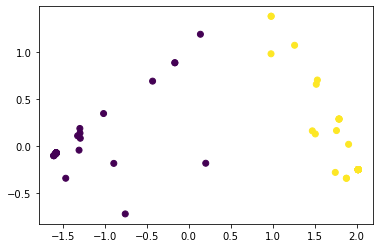

In [35]:
plt.scatter(pca_columns[:,0], pca_columns[:,1], c=model.labels_)

Indeed, as we can see, our clustering algorithm has broken up the data cleanly, at least in terms of the two most important dimensions from PCA.

OK, but now what if we look for more clusters in the data. Are there moderate and extreme factions of each party that would appear if we try something like four clusters? 

In [36]:
model = KMeans(n_clusters=4)
model.fit(raw_data)

print(pd.crosstab(model.labels_, votes['party']))

party   D  I   R
row_0           
0       6  0   2
1       0  0  52
2      31  1   0
3       7  1   0


Alright, now we see that the Republicans all pretty much hang together, though there is a small separate group that votes together with six Democrats:

In [37]:
mixed_group = votes[(model.labels_==2)]
print(mixed_group)

          name party state  00001  00004  00005  00006  00007  00008  00009  \
2      Baldwin     D    WI    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
5   Blumenthal     D    CT    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
7       Booker     D    NJ    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
9        Boxer     D    CA    0.5    0.0    0.0    1.0    0.0    1.0    0.0   
10       Brown     D    OH    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
12    Cantwell     D    WA    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
14      Cardin     D    MD    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
21       Coons     D    DE    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
29      Durbin     D    IL    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
32   Feinstein     D    CA    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
35     Franken     D    MN    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
37  Gillibrand     D    NY    1.0    0.0    0.0    1

Looks like its Ayotte and Collins, both of whom are often described as moderate Republicans vote together with the moderate Democrats from before and a few others. Now let's look at the separate group of Democrats and the Independent they vote with. Will this be a progressive group who votes together with Bernie?

In [38]:
sep_dems = votes[(model.labels_==3)]

print(sep_dems)

         name party state  00001  00004  00005  00006  00007  00008  00009  \
4      Bennet     D    CO    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
15     Carper     D    DE    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
16      Casey     D    PA    0.0    0.0    0.0    1.0    0.0    1.0    1.0   
41   Heinrich     D    NM    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
50       King     I    ME    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
52  Klobuchar     D    MN    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
71     Peters     D    MI    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
87   Stabenow     D    MI    0.0    0.0    0.0    1.0    0.0    1.0    0.0   

    00010  00020  00026  00032  00038  00039  00044  00047  
4     1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0  
15    1.0    0.0    0.0    0.0    1.0    0.0    1.0    1.0  
16    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0  
41    1.0    0.0    0.0    1.0    1.0    0.0    1.0  

No, in fact the Independent is Angus King who is fairly moderate. We do see that they all tended to vote almost entirely as a block on seven bills and not at all on other ones. If we looked more closely at these bills, we could get a better sense of the kinds of policies this faction of the party represented.

Now, let's conclude by looking at what might be the best count of clusters to use for this data to best characterize how the senators group together. We'll use both the Elbow Method and the Silhouette Method.

Text(0, 0.5, 'intertia (or WSS)')

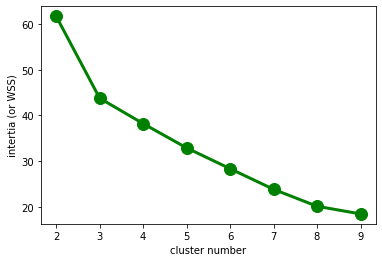

In [39]:
# lets make a list of models we'll append to
model_list = []
inertia_list = []
for j in range(2,10):
    model = KMeans(n_clusters=j)
    model.fit(raw_data)
    model_list.append(model)
    inertia_list.append(model.inertia_)
    
plt.plot(range(2,10),inertia_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("intertia (or WSS)")

Looks like 3 might be the best number based on the Elbow Method, since the inertia drop is way less significant from 3 to 4. Now let's try the Silhouette Method.

Text(0, 0.5, 'silhouette score')

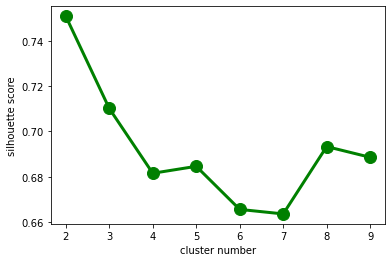

In [40]:
silh_list = []

# loop through the fit models and compute the silhouette score and store in a list
# we use the Euclidean distance to compute distance between points and cluster
for j in range(0,8):
    model = model_list[j]
    silh_score = silhouette_score(raw_data, model.labels_, metric='euclidean')
    silh_list.append(silh_score)
    
plt.plot(range(2,10),silh_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("silhouette score")

Looks like six is the best according to the Silhouette Method, so we could go further by analyzing a six cluster model of the Senate.

### Exercise: Clustering wine based on a chemical analysis
In the following exercise you will analyze the same wine data set from the visualization module yesterday. The data set contains 178 different wines from the same region of Italy but from three different cultivars (the Class). You will use some of the methods learned above in order to try and separate the wines into groups based on a clustering analysis.

**1.** Start by loading the file 'wine.csv' as a pandas dataframe and look at its header. Use the variable name *wine* for the loaded data frame.

In [41]:
wine = pd.read_csv("csvfiles/wine.csv")
wine.head()

,Class,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**2.** Now compute the mean of each column of the resulting dataframe.

In [42]:
wine.mean()

Class                     1.938202
alcohol                  13.000618
malic acid                2.336348
ash                       2.366517
alkalinity               19.494944
magnesium                99.741573
phenols                   2.295112
flavanoids                2.029270
nonflavanoid phenols      0.361854
proanthocyanins           1.590899
color                     5.058090
hue                       0.957449
OD280/OD315               2.611685
proline                 746.893258
dtype: float64

**3.** Notice that some of the data have much larger means than others. To put all the data on equal footing, we will scale it, except for the class column, and store it in a new dataframe with the columns labeled appropriately.

In the case of KMeans, the often recommended way to do this is to shift each data point by the ensemble mean and scale by the ensemble standard deviation:
$$
z_j = (x_j - \mu)/\sigma,
$$
which we can do using the StandardScaler function in the preprocessing library.

Run the cell below to do this.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_wine = scaler.fit_transform(wine)

scaled_frame = pd.DataFrame(scaled_wine[:,1:],columns=wine.columns[1:])

scaled_frame.head()

,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color,hue,OD280/OD315,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


**4.** Create a couple of scatter plots based on the rescaled data. For instance, plot alkalinity vs. alcohol and phenols vs. ash. Do you see any clear breaks in the data suggesting partitioning into groups?

Text(0, 0.5, 'rescaled alkalinity')

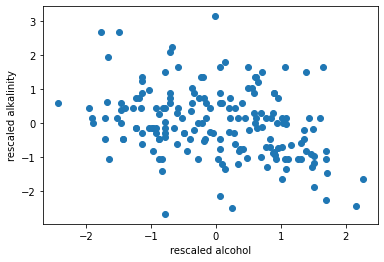

In [45]:
plt.scatter(scaled_frame['alcohol'], scaled_frame['alkalinity'])
plt.xlabel("rescaled alcohol")
plt.ylabel("rescaled alkalinity")

Text(0, 0.5, 'rescaled phenols')

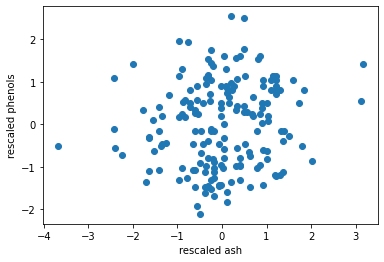

In [46]:
plt.scatter(scaled_frame['ash'], scaled_frame['phenols'])
plt.xlabel("rescaled ash")
plt.ylabel("rescaled phenols")

Some sign above of there being a split of the data into some with high and some with low phenols.

**5.** Use KMeans to cluster the data using all thirteen columns of rescaled data into three clusters. Then use principal components analysis to plot a scatter plot of the data color coded by cluster label. Comment on what you see.

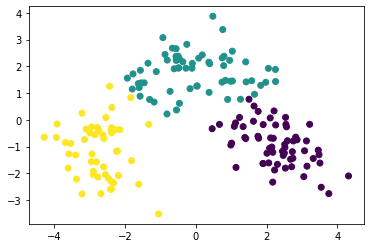

In [47]:
model = KMeans(n_clusters=3)
model.fit(scaled_frame)

pca_2 = PCA(2)
pca_columns = pca_2.fit_transform(scaled_frame)

plt.scatter(pca_columns[:,0], pca_columns[:,1], c=model.labels_)

We see that the data are well separated into three distinct clusters along the two main dimensions of the principal components.

**6.** Use a crosstab to illustrate the correspondance between the clusters you found using KMeans and the classes indicated in the data set.

In [48]:
print(pd.crosstab(model.labels_, wine['Class']))

Class   1   2   3
row_0            
0      59   3   0
1       0  65   0
2       0   3  48


Indeed, we see that the different cultivars do have chemically distinct wines, but there is some overlap of the class 2 cultivar's wine.

**7.** Characterize each wine cluster by printing its centroid and compare between the three clusters. What are the distinct features, in terms of chemical composition, of each wine cluster?

In [49]:
pd.DataFrame(model.cluster_centers_,columns=scaled_frame.columns)

,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color,hue,OD280/OD315,proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
2,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


Cluster 1 seems to have the most alcohol, ash, magnesium, phenols, flavanoids, proanthocyanins, and proline.

Cluster 0 has the most malic acid, alkalinity, nonflavanoid phenols, and color.

Cluster 2 has less of everything, so maybe these are the milder wines?

**8.** Use both the Elbow Method and Silhouette Method to determine the optimal number of clusters. Pick either one of these optima or (if both are three) another cluster count and repeat some of the above analysis with that different cluster number count. Any significant changes in the qualitative results?

Text(0, 0.5, 'intertia (or WSS)')

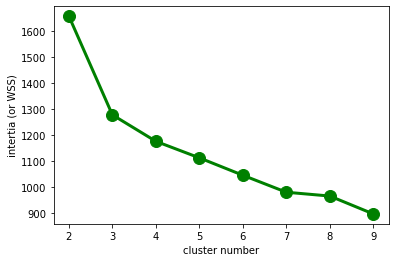

In [50]:
model_list = []
inertia_list = []
for j in range(2,10):
    model = KMeans(n_clusters=j)
    model.fit(scaled_frame)
    model_list.append(model)
    inertia_list.append(model.inertia_)
    
plt.plot(range(2,10),inertia_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("intertia (or WSS)")

Three clusters seems best based on the Elbow Method.

Text(0, 0.5, 'silhouette score')

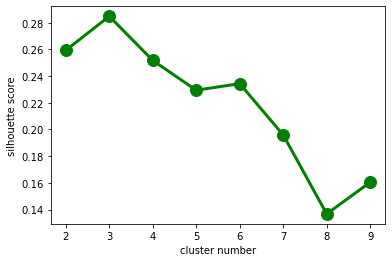

In [51]:
silh_list = []

# loop through the fit models and compute the silhouette score and store in a list
# we use the Euclidean distance to compute distance between points and cluster
for j in range(0,8):
    model = model_list[j]
    silh_score = silhouette_score(scaled_frame, model.labels_, metric='euclidean')
    silh_list.append(silh_score)
    
plt.plot(range(2,10),silh_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("silhouette score")

Three clusters again seems best.

Let's try analyzing based on two clusters.

In [52]:
model = model_list[0]
print(pd.crosstab(model.labels_, wine['Class']))

Class   1   2   3
row_0            
0       0  43  48
1      59  28   0


We see that cultivar 2 straddles the classification of cultivar 1 and 3.

In [53]:
pd.DataFrame(model.cluster_centers_,columns=scaled_frame.columns)

,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color,hue,OD280/OD315,proline
0,-0.311480,0.338373,-0.049931,0.469765,-0.307460,-0.750371,-0.789532,0.567703,-0.611531,0.098226,-0.540072,-0.685165,-0.580218
1,0.325801,-0.353930,0.052227,-0.491363,0.321596,0.784870,0.825832,-0.593804,0.639648,-0.102742,0.564903,0.716667,0.606894


Cluster 0 has more alcohol, ash, magnesium, phenols, flavanoids, proanthocyanins, hue, OD280/OD315,	and proline.

### Bonus Analysis: Customer spending database
Finally, let's analyze a customer spending database which contains binary gender, age, annual income, and spending score (based on their propensity for spending at the mall) information. We'll use this example to illustrate the importance of normalizing data. To start with, let's load the associated csv file and show the header to get a sense of how the first few rows of data look.

In [54]:
mall = pd.read_csv("csvfiles/Mall_Customers.csv")

mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


One thing we can do with clustering, as we saw in the previous example is cluster using some variables in a data set and then see how that compares with other categorical or continuous variables in the data set. In the previous case, we clustered based on voting and compared to political party. Here, we might consider doing something like clustering based on income and spending score and comparing to age or gender.

Before doing that though, we should normalize the data. Normalizing data ensures that variables that tend to take on large values don't swamp variables that take on small values when fitting, since we're using Euclidean distance to fit. It looks like Spending Score could overall have larger values than Annual income. We can look at this quickly by getting the means of each of the three numerical columns.

In [55]:
mall[['Age',  'Annual Income (k$)', 'Spending Score (1-100)']].mean()

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

Actually we see that annual income has a higher mean, then spending score, then age. We will again use the standard scaler to scale the data.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

raw_data = mall.iloc[:, 2:]
scaled_data = scaler.fit_transform(raw_data[['Age',  'Annual Income (k$)', 'Spending Score (1-100)']])
print(scaled_data)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

So now we have 3 columns of scaled data we can use to cluster. We could make this into a data frame.

In [57]:
scaled_frame = pd.DataFrame({'age':scaled_data[:,0],
                           'income':scaled_data[:,1],
                           'spend score':scaled_data[:,2]})

scaled_frame.head()

,age,income,spend score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Now maybe we have a hypothesis that income and spending score are sufficient to cluster the data and that the resulting clusters will naturally fall into different age brackets. Let's start by scatter plotting based on income and spending score to see if we spot enough of a pattern to determine how many clusters to use.

Text(0, 0.5, 'rescaled spending score')

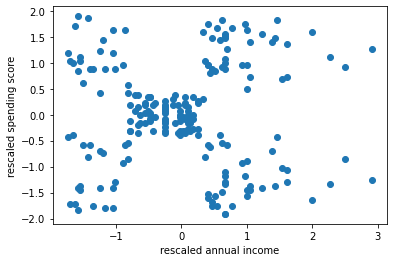

In [58]:
plt.scatter(scaled_frame['income'], scaled_frame['spend score'])
plt.xlabel("rescaled annual income")
plt.ylabel("rescaled spending score")

We can see immediately that it looks like we maybe have five different clusters in the data, so let's try that.

In [59]:
model = KMeans(n_clusters=5)
model.fit(scaled_data[:,1:])

KMeans(n_clusters=5)

First let's see how well this clusters the data along the dimensions we used to build the model.

Text(0, 0.5, 'rescaled spending score')

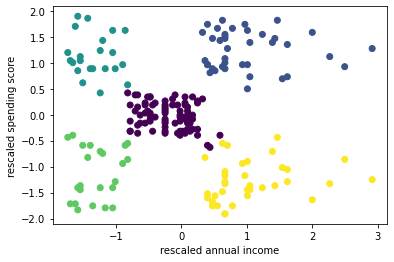

In [60]:
plt.scatter(scaled_frame['income'], scaled_frame['spend score'],c=model.labels_)
plt.xlabel("rescaled annual income")
plt.ylabel("rescaled spending score")

Now let's see how this compares to the variables we did not fit to starting with age.

Text(0, 0.5, 'cluster label')

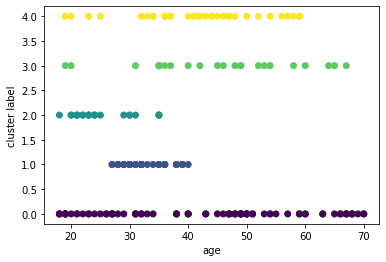

In [61]:
plt.scatter(raw_data['Age'], model.labels_,c=model.labels_)
plt.xlabel("age")
plt.ylabel("cluster label")

Looks like the 0th cluster is spread across ages, while the 1st and 4th clusters are more focused at lower ages (interestingly the clusters with higher spending score) and the 2nd and 3rd clusters are more at higher ages (those with a lower spending score). This suggests a correlation between age and spending score which we could probably see if we visualized data along those dimensions.

We can also break the clusters down by gender by simply generating a crosstab displaying gender and cluster label as we did in the case of our previous data set.

In [62]:
print(pd.crosstab(model.labels_, mall['Gender']))

Gender  Female  Male
row_0               
0           48    33
1           21    18
2           13     9
3           14     9
4           16    19


There seems to be no real strong correlation between cluster number and gender.

Now, we could go one step further and cluster based on age, income, and spending score. Then, we could see if this changes at all the partitioning along the two-dimensional projection we looked at before, but could extend this to plotting age vs. income and age vs. spending score. Let's try this.

In [63]:
model = KMeans(n_clusters=5)
model.fit(scaled_data)

KMeans(n_clusters=5)

Now we'll generate three different plots with all three possible pairings of the variables we used to fit.

Text(0, 0.5, 'rescaled spending score')

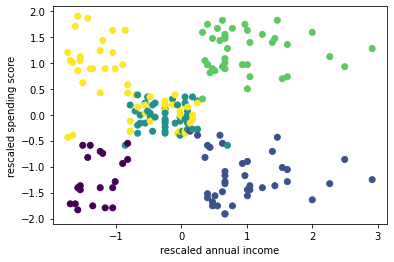

In [64]:
plt.scatter(scaled_frame['income'], scaled_frame['spend score'],c=model.labels_)
plt.xlabel("rescaled annual income")
plt.ylabel("rescaled spending score")

Text(0, 0.5, 'rescaled spending score')

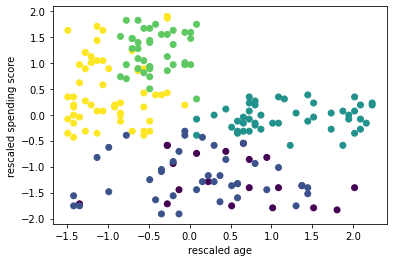

In [65]:
plt.scatter(scaled_frame['age'], scaled_frame['spend score'],c=model.labels_)
plt.xlabel("rescaled age")
plt.ylabel("rescaled spending score")

Text(0, 0.5, 'rescaled income')

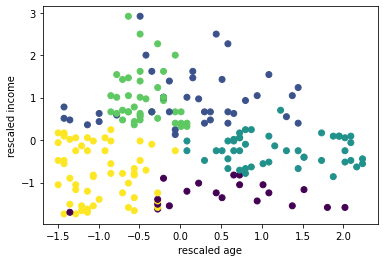

In [66]:
plt.scatter(scaled_frame['age'], scaled_frame['income'],c=model.labels_)
plt.xlabel("rescaled age")
plt.ylabel("rescaled income")

So we can see that there is not perfect separation along any of these two dimensional projections, but generally the clustering does tend to separate into visible clusters.

To conclude, let's look again at the optimal cluster count for this data set to see if our initial guess of five provides the best grouping. Start with the Elbow Method.

Text(0, 0.5, 'intertia (or WSS)')

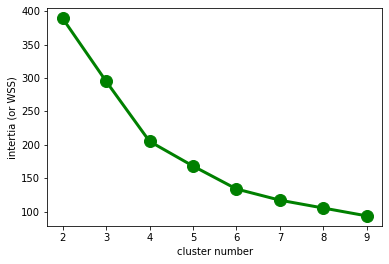

In [67]:
model_list = []
inertia_list = []
for j in range(2,10):
    model = KMeans(n_clusters=j)
    model.fit(scaled_frame)
    model_list.append(model)
    inertia_list.append(model.inertia_)
    
plt.plot(range(2,10),inertia_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("intertia (or WSS)")

Somewhat hard to say where the elbow is here, but it looks like around 5 to 6 clusters, there are diminishing returns from adding more clusters. Now for the Silhouette Method.

Text(0, 0.5, 'silhouette score')

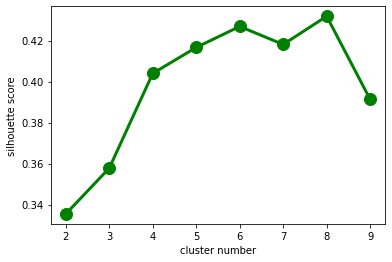

In [68]:
silh_list = []

# loop through the fit models and compute the silhouette score and store in a list
# we use the Euclidean distance to compute distance between points and cluster
for j in range(0,8):
    model = model_list[j]
    silh_score = silhouette_score(scaled_frame, model.labels_, metric='euclidean')
    silh_list.append(silh_score)
    
plt.plot(range(2,10),silh_list,'go-', linewidth=3, markersize=12)
plt.xlabel("cluster number")
plt.ylabel("silhouette score")

Seems to be maximized around six, so perhaps one more dimension than we used would be best.